Loading The Dataset 

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


data=pd.read_csv(r'.\data\Salary-Data.csv')
print("Dataset Loaded Successfully")

print("Shape Of the Dataset: ", data.shape)
print("Columns in the Dataset: ", data.columns.tolist())
print("First 5 Rows of the Dataset: ")
print(data.head())

# Check for null values
print("\nMissing values:\n", data.isnull().sum())

Dataset Loaded Successfully
Shape Of the Dataset:  (6704, 6)
Columns in the Dataset:  ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
First 5 Rows of the Dataset: 
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Missing values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


Now We can go with data processing

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data=data.dropna(subset=['Salary'])

x=data.drop('Salary',axis=1)
y=data['Salary']

cat_cols = ['Gender', 'Education Level', 'Job Title']
num_cols = ['Age', 'Years of Experience']

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', num_imputer),
        ('scaler', scaler)
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('encoder', encoder)
    ]), cat_cols)
])
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4689, 5)
Testing set shape: (2010, 5)


# Step 3: Train Multiple Regression Models
1. Linear Regression
2. Random Forest Regressor
3. Support Vector Regressor (SVR)
4. Gradient Boosting Regressor

Modal Evaluation Metrics:

- `R²` Score
- Mean Absolute Error `(MAE)`
- Mean Squared Error `(MSE)`
- Root Mean Squared Error `(RMSE)`

In [47]:
# Step 3: Model Training and Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Fit and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Print evaluation results
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")



Linear Regression Results:
R2 Score: 0.88
MAE: 13156.83
MSE: 349696806.79
RMSE: 18700.18

Random Forest Results:
R2 Score: 0.98
MAE: 3037.66
MSE: 59666617.46
RMSE: 7724.42

SVR Results:
R2 Score: 0.01
MAE: 45488.23
MSE: 2782322072.41
RMSE: 52747.72

Gradient Boosting Results:
R2 Score: 0.92
MAE: 11394.53
MSE: 233078991.25
RMSE: 15266.92


# Best Model: Random Forest



Highest R² (0.98 → very close to perfect).

Lowest MAE and RMSE → smallest prediction errors.

Handles non-linear relationships better than Linear Regression.



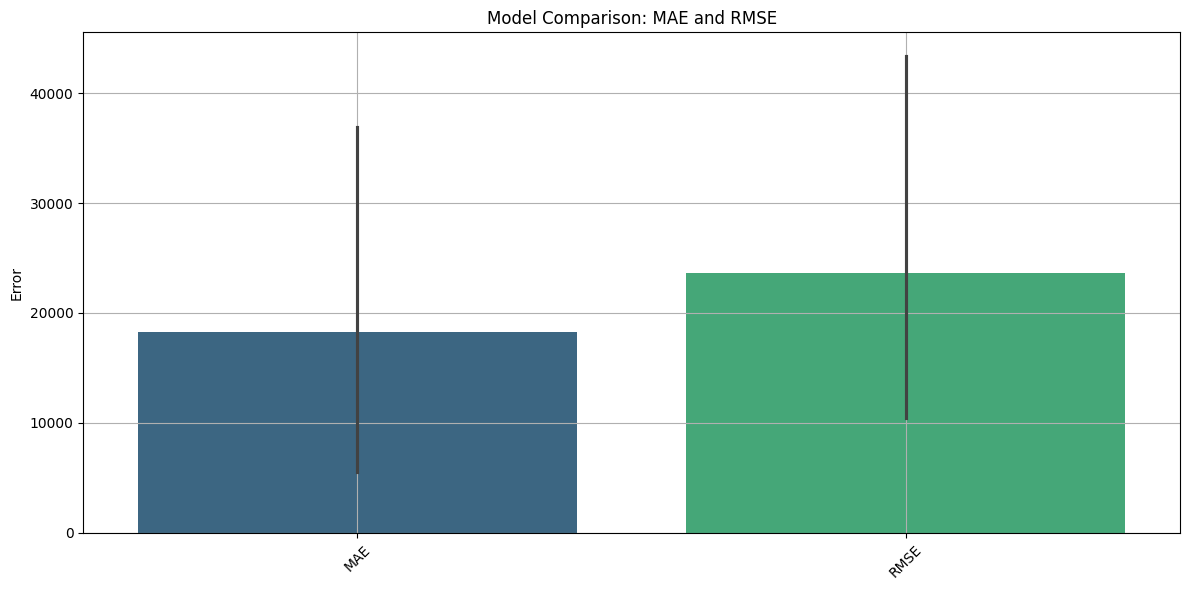

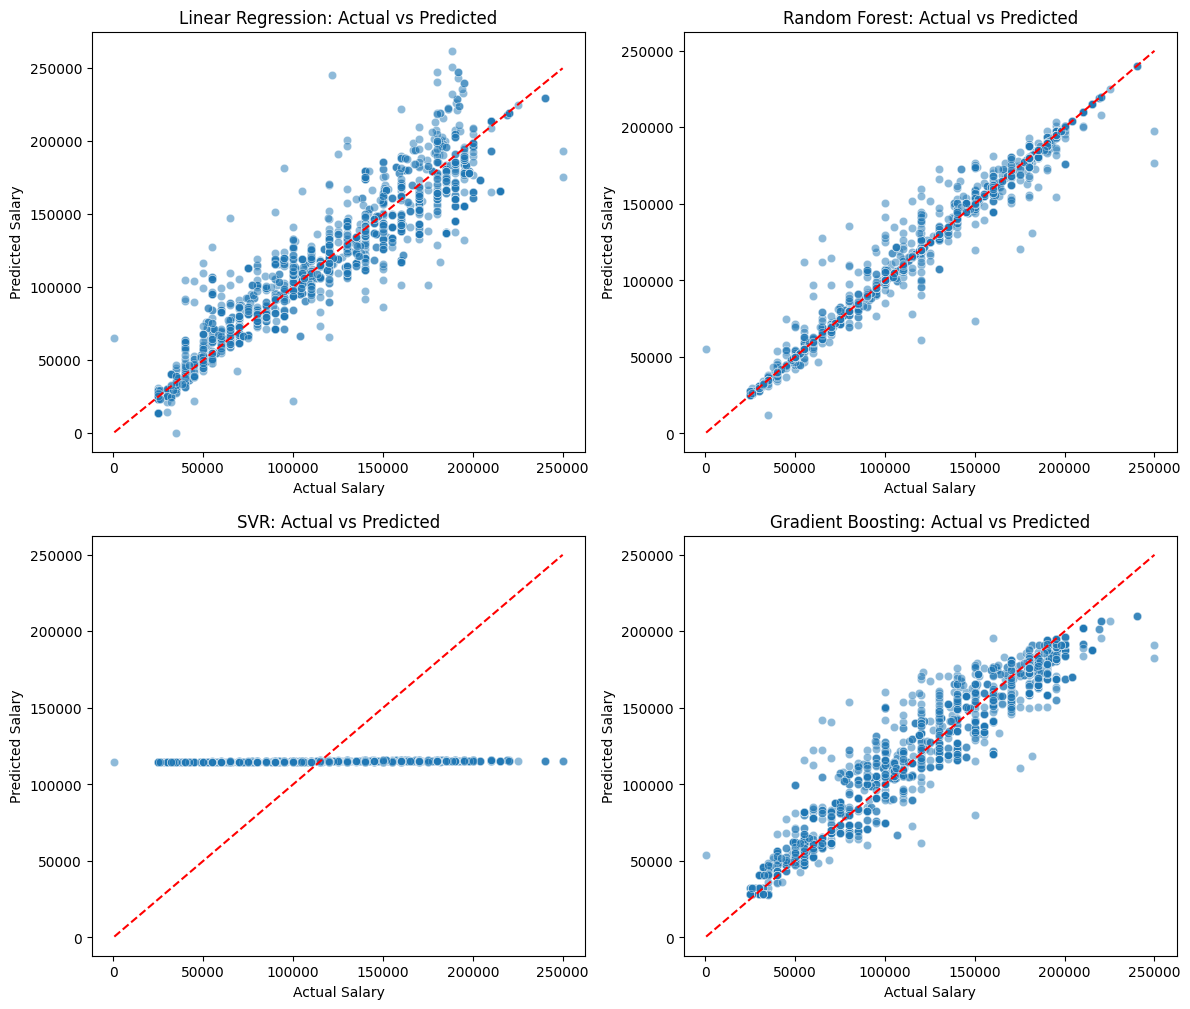

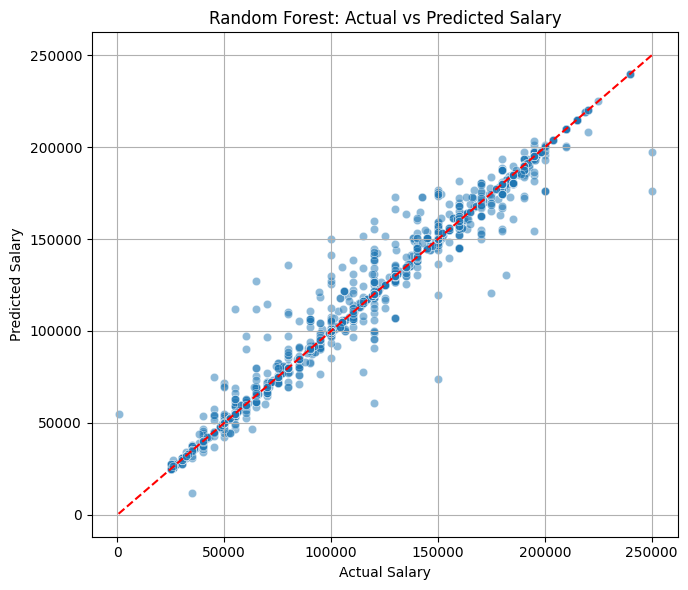

In [48]:
# Step 4: Graphical Comparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Bar Plot of Evaluation Metrics ---
metrics_df = pd.DataFrame(results).T

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df[['MAE', 'RMSE']], palette='viridis')
plt.title("Model Comparison: MAE and RMSE")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Actual vs Predicted for ALL Models ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows, 2 columns for 4 models
axes = axes.flatten()  # Flatten to make indexing easier

for i, (name, model) in enumerate(models.items()):
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Scatter plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[i])
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 color='red', linestyle='--')
    axes[i].set_title(f"{name}: Actual vs Predicted")
    axes[i].set_xlabel("Actual Salary")
    axes[i].set_ylabel("Predicted Salary")

best_model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted Salary")
plt.grid(True)


plt.tight_layout()
plt.show()



# Step 5: Predict Salary from New Input


In [49]:
# Step 5: Predict Salary from Custom Input

def predict_salary(age, gender, education, job_title, experience):
    # Create a single-row DataFrame
    input_df = pd.DataFrame([{
        'Age': age,
        'Gender': gender,
        'Education Level': education,
        'Job Title': job_title,
        'Years of Experience': experience
    }])

    
    predicted_salary = best_model.predict(input_df)[0]
    
    print(f"\n🔍 Predicted Salary for given input: ${predicted_salary:,.2f}")

predict_salary(
    age=30,
    gender='Male',
    education="Master's",
    job_title='Data Analyst',
    experience=5
)


🔍 Predicted Salary for given input: $141,578.82
